<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/ML_For_DS/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TEMEL BİLEŞEN REGRESYONU (PRINCIPAL COMPONENT REGRESSION - PCR)

### Teori

Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regreyon modeli kurulması fikrine dayanır. 

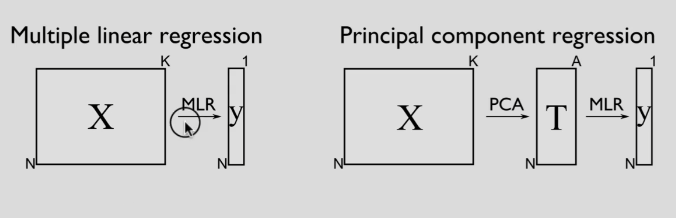

PCR, bağımsız değişkenler arasındaki otokorelasyonu çözmek için ortaya çıkmıştır. İşleyişi: veri setindeki değişken sayısını azaltma. Bunun faydaları:
* Bağımsız değişkenler arası oluşan otokorelasyonun önüne geçme. Böylece otokorelasyon ile artan varyansın önüne geçerek yanlılığın önne geçer.
* Daha az değişken ile r2 scorumuz fazlaysa onları çıkartıp işlemleri hızlandırma.
* Gözlem sayısı az, değişken sayısı fazla olan veri setlerinde (çok boyutluluk laneti) bağımsız değişkenlerin katsayılarını bulmak zordur. Değişken sayısını r2 değeri çok düşmeyecek şekilde azaltarak daha elde tutulur bir model üretmeyi sağlar.

### Uygulama

#### 1.Model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
hit = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hit.copy()

In [4]:
df.isnull().values.any()

True

In [5]:
#null olanları atıyoruz
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [6]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [7]:
## kategorik değişkenleri one hot encoding yapalım (Dummy değişken yaparak). Böylece hafızayıda optimize etmiş oluruz.
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [8]:
y = df["Salary"]

In [9]:
X = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64") # bağımsız ve kategorik değişkenlerin ilk hallerini çıkarttık. Şimdi yeni hallerini ekleyeceğiz.


In [10]:
X = pd.concat([X, dms[["League_N","Division_W","NewLeague_N"]]], axis =1) #tekrar eden dummy tuazğına yakalanmamak için tekrar edenlerden 2.leri

In [11]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=40
                                                    )
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
training = df.copy()
print("training: ",training.shape)

X_train: (197, 19), X_test: (66, 19), y_train: (197,), y_test: (66,)
training:  (263, 20)


**Not:** PCR'ın, R'da olduğu gibi doğrudan bir uygulaması Python'da olmadığı için kendimiz yazıyoruz. Sırayla yapacağımız işlemler:
1. PCA (Principal Component Analysis), yani verinin ölçeklendirilmesi ve bileşenlerinin oluşturulması.
2. PCA çıktısı ile PCR yapacağız. 

In [13]:
pca = PCA() # yani bildiğin instance oluşturmayı da sana anlatmyiyim kral. Ayıptır
#PCA() parametre olarak bileşen sayısı alır. Default bıraktığında, değişken sayısı kadar bileşen olşturur.

In [14]:
X_reduced_train = pca.fit_transform(scale(X_train))
# şuan elimizde, değişken sayısı kadar bileşen oluşturulmuş fakat aralarındaki bağlantı (korelasyon sorunu) kalkmış bir veri seti var.
# yukarıda fit_transform() yerine fit() fonksiyonu kullanılsaydı model oluşmuş olurdu. fit_transform() kullandık ki, hem X'e göre model oluisun hemde boyut indirgeme işlemi yapılsın.
# Tahmin edebileceğin gibi, transform()'da boyut indirgeme yapıyor.

In [15]:
X_reduced_train[:1,:] # ilk gözlemin tüm değişken değerleri.

array([[-2.64829403, -0.14199164,  0.30354129, -1.43029226,  0.65997608,
        -1.00070416, -0.02034225,  0.79567512, -0.24923217,  0.4815807 ,
         0.10005654,  0.05093836, -0.0333218 ,  0.26055693,  0.04084967,
        -0.15501004,  0.02674988,  0.03490856,  0.0151464 ]])

Soru: x_reduced.shape yine 197,19 ama değerler farklı

-Linkteki cevap

PCA ile oluşturduğumuz bileşenler var: Burada bileşen aslında mevcut değişkenlerin kombinasyonlarından oluşan yeni değişkenler ve biz bunları göremiyoruz(bildiğim kadarıyla göremiyoruz). Bu bileşenler oluşturulurken, aralarında yüksek korelasyonlu olan değişkenler seçiliyor ve birbirleri ile çeşitli kombinasyonlar oluşturuluyor.

PCA, default halinde bu yeni bileşen sayısını, veri setindeki mevcut değişken sayısına eş olarak seçiyor. Yani örneğin 20 değişken varsa veri setinde 20 tane bileşen oluşturuyor.

Ek olarak,

Dilerseniz yani veri setinde değişken sayısı çok fazla ise sütun sayısını düşürecek şekilde bileşen oluşturabilirsiniz. Bu da veri setinizin boyutunu azaltmaya yardımcı olur.



Belirtiğim pca işleminden bağımsız olarak scale i soruyorsanız:

PCA varyansı maksimize ettiği için öncesinde mutlaka scaling işlemlerini yapmamız gerekiyor. Bu örnekteki scale işlemi, ortalamayı 0 varyansı 1 yapıyor.



Sonuç olarak önce scale işlemi yapılıp sonra bileşen oluşturuluyor ve bu bileşen sayısı da default olarak bırakıldığı için veri boyutunda azalma olmuyor.

----
Bunun dışında,

- Gözlem birimi: Veri setindeki her bir satır aslında. Burada örneğin 1 oyuncuya bakılmış, Hits değeri not edilmiş, years, walks, runs, league vs not edilmiş. Bu bir oyuncuya dair bu değerlerin tamamı 1 gözlem birimi oluyor. df.info'da gördüğümüz üzere 263 tane gözlem var bu veri setinde, yani 263 tane oyuncunun özellikleri gibi düşünebilirsiniz.



- Bizim veri setimizde değişkenlerimiz var:     Errors, Runs , CRBI gibi



- PCA ile oluşturduğumuz bileşenler var:       Burada bileşen aslında mevcut değişkenlerin kombinasyonlarından oluşan yeni değişkenler ve biz bunları göremiyoruz(bildiğim kadarıyla göremiyoruz). Bu bileşenler oluşturulurken arka tarafta, aralarında yüksek korelasyonlu olan değişkenler seçiliyor ve birbirleri ile çeşitli kombinasyonlar oluşturuluyor. PCA, default halinde bu yeni bileşen sayısını, veri setindeki mevcut değişken sayısına eş olarak seçiyor. Yani örneğin 20 değişken varsa veri setinde 20 tane bileşen oluşturuyor.



- İndirgenmiş veri setinde ise; aralarında korelasyon problemi olmayan( yukarıda bahsettiğim gibi.. yüksek korelasyonlu değişkenler ortadan kalkmış oldu) bileşenler ve scale edilmiş yani ölçeklendirilmiş değerler var.

---


In [16]:
# şimdi açıklanan varyansı inceleyelim. İlk 10 bileşen ve bu bileşenlerce açıklanan kümilatif varyansı inceleyelim.
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:10]

array([37.89, 59.35, 70.47, 78.4 , 83.71, 88.18, 92.02, 94.88, 96.31,
       97.24])

Yukarıda elde ettiğimiz sonuç şu anlama geliyor:
* İlk değişken kendi başına veri setindeki değişkenliği (yani varyansı), 37.89 kadar açıklayabiliyor.
* ilk 2 değişken (birlikte), veri setindeki değişkenliği(varyansı) 59.35 kadar açıklayabiliyor.
* ...
* ...
* İlk 7 değişken (birlikte) veri setindeki değişkenliği 92.02 kadar açıklayabiliyor. Bu gayet iyi bir seviye.

Temel Bileşen Analizi işte bu oluyor. Veri setini indirgedik. Şimdi PCR uygulamaya geçiyoruz.

In [17]:
lm = LinearRegression()

In [18]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [19]:
pcr_model.intercept_

555.0864517766497

In [20]:
pcr_model.coef_

array([ 107.29355728,  -15.38005092,    8.59096379,  -27.74451724,
        -54.72522692,   93.36218094,   54.63455134,   13.34969438,
         61.64188629,  181.20728707,   37.05817038,    5.59800003,
        -14.42598083, -204.1025765 , -179.50800528,  510.91343615,
       -430.60035526,  758.01684002,  598.94676877])

#### 2. Tahmin

In [21]:
y_pred = pcr_model.predict(X_reduced_train)

In [22]:
y_pred[:5]

array([156.06256908, 350.7385924 , 720.15393552, 353.2353584 ,
       553.72653887])

In [23]:
## train seti için hata hesaplayalım
np.sqrt(mean_squared_error(y_train, y_pred))

291.4289845670623

In [24]:
df["Salary"].mean() 

535.9258821292775

In [25]:
r2_score(y_train, y_pred) # r2 değeri, validasyon işlemlerini model tunningd ele alacağız.
# r2 değeri bize model uyumluluğunu veriyordu.

0.5891030840822112

In [26]:
# test hatasını hesaplayalım
pca2 = PCA()

In [27]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [28]:
y_pred = pcr_model.predict(X_reduced_test)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

349.23749924536213

In [30]:
r2_score(y_test, y_pred)

0.3461684442821189

#### 3.Model Tunning

Buraya kadar olan kısımda PCA ile değişkenleri indirgeyerek aralarında korelasyon olmayan  bağımsız bileşenler oluşturduk. Yani çoklu değişken lanetini kaldırdık. Burada aklının karışmaması için tekrar deyinelim: Biz bir tür yeni değerler ürettik ve bu değerlerin ait olduğu kolonlar ( bağımsız değişkenler) diğer kolonalr ile korelasyonu minimumda.

Şimdi gelelim PCR'a. PCR'ın asıl kısmı burası. Burada _Modeli optimize edeceğiz_. Bunuda bileşen sayısını, yani bağımsız değişken sayısını, azaltarak yapacağız. Bileşen sayısını azaltarak en optimum model bulmanın bir kaç farklı yolu var. Birisi teker teker bileşenşerin kombinasyonlarını gider deneriz: hangi bileşen kombinasyonalrı bize daha net sonuç veriyor gibi gibi. Buna Brute Force denir, hatırlamışsındır bir yerlerden :)

In [31]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print("Test Hatamız: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Test Hatamız:  349.23749924536213


Şimdi, 1 Bileşeni - 2 Bileşenli - 3 Bieşenli... kombinasyonları deneyerek en hata sonuçalrımıza bakacağız. 

In [32]:
lm2 = LinearRegression()
pcr_model2 = lm.fit(X_reduced_train[:,0:1],y_train)  # 1 Bileşen alıyoruz
y_pred = pcr_model2.predict(X_reduced_test[:,0:1])   # Eğittiğin veri setindeki bileşen azaltmayı testte de yapmazsan boyut hatası alırsın.
print("1 bileşen ile Test Hatamız: ", np.sqrt(mean_squared_error(y_test,y_pred)))

1 bileşen ile Test Hatamız:  329.6183559710834


In [33]:
lm3 = LinearRegression()
pcr_model3 = lm.fit(X_reduced_train[:,0:2],y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:2])
print("2 bileşen ile Test Hatamız: ", np.sqrt(mean_squared_error(y_test,y_pred)))

2 bileşen ile Test Hatamız:  323.8248836242272


In [34]:
lm4 = LinearRegression()
pcr_model4 = lm.fit(X_reduced_train[:,0:10],y_train)
y_pred = pcr_model4.predict(X_reduced_test[:,0:10])
print("10 bileşen ile Test Hatamız: ", np.sqrt(mean_squared_error(y_test,y_pred)))

10 bileşen ile Test Hatamız:  337.5183076475362


Gördüğün gibi, 1 ve 2 bileşende iyiyken 10 bileşende baya çıktı. Bunları teker teker elle denemek gibi bir saçmalık yapmıyor, cross validation'a bileşen sayısı değerlerini bir array/vektör olarak gönderip, bize optimum döndürdüğü sonuç ile bileşen sayımızı seçiyoruz.

In [35]:
from sklearn import model_selection

In [36]:
cv_10 = model_selection.KFold(n_splits = 10,
                              shuffle = True,
                              random_state = 1
                              ) # şu anda 10 katlı cross validation yapılandırılması yapmış olduk.

In [37]:
lm5 = LinearRegression()
RMSE = []     # her bir bileşen sayısı ile oluşan modelin hata sonuçlarını bu listede tutacağız. Bunun sonucunda bu hataları görselleştirip değerlendireceğiz!!

In [38]:
for i in np.arange(1, X_reduced_train.shape[1]+1):  # shape[1] kolon sayısını veriyor
  score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                     X_reduced_train[:,:i],     # teker teker bileşen sayısını arttırarak deneyecek
                                                     y_train.ravel(),           # numpy dizisine döndürdük, yapısal sorunlar gereği
                                                     cv = cv_10,                # kat belirtiyorduk, yukarıda yptığımız şey, 10 vermek yerine biraz daha özelleştirmek. Veri setini karıştırıp kfold yaptık
                                                     scoring = "neg_mean_squared_error").mean()) # bu zaten senin dönmeini istediğin sonuç tipini yazdığın değişken 
  RMSE.append(score)


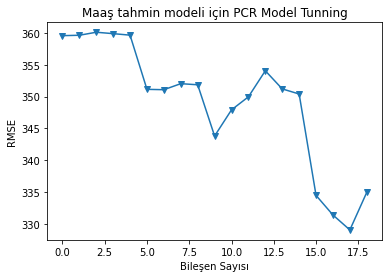

In [39]:
import matplotlib.pyplot as plt
plt.plot(RMSE, "-v")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.title("Maaş tahmin modeli için PCR Model Tunning");

"İyi güzel ama sorun şu, yukarıdaki grafikte bize hangi bileşenler ile oluştuduğunu söylemiyor. Bu yüzden hangi kolonları/ değişkenleri kullandığımızı bilmiyoruz. Bu yüzden iş dünyasında çok tercih edilmiyor." deniliyor. Fakat kolonalrı teker teker ilerletiyoruz. Bu konuyu araştır.

Yukarıdaki grafikten yapacağımız yorum şu: optimum bileşen sayısının kaç olması gerektiğini, cross_val yöntemini ve train setini kullanarak(onuçta cros val trainde olur). gerçekleştiririz.

Baktığımızda en iyi sonuç 17 bileşenle iken olmuş. Şimdi en optime sayı ile bulduğumuza göre final modelini oluşturmamız gerekir.

In [40]:
RMSE

[359.56663136540703,
 359.6287023658732,
 360.10219736622736,
 359.8823194811776,
 359.6449453869161,
 351.13393534688475,
 351.0787779370922,
 352.0258918372437,
 351.8506823809118,
 343.8048905699396,
 347.91271189563923,
 349.9620702797459,
 354.0514056148365,
 351.2017429958764,
 350.4040829548935,
 334.47657200379444,
 331.39788854714106,
 329.0567565417007,
 334.96313379505705]

In [41]:
lmFinal = LinearRegression()
pcr_modelFinal = lm.fit(X_reduced_train[:,0:17],y_train)
y_pred = pcr_modelFinal.predict(X_reduced_train[:,0:17])
print("17 bileşen ile, en optimum,  Eğitim Hatamız: ", np.sqrt(mean_squared_error(y_train,y_pred)))


17 bileşen ile, en optimum,  Eğitim Hatamız:  296.44305008586133


In [42]:
y_pred = pcr_modelFinal.predict(X_reduced_test[:,0:17])
print("17 bileşen ile, en optimum,  Eğitim Hatamız: ", np.sqrt(mean_squared_error(y_test,y_pred)))

17 bileşen ile, en optimum,  Eğitim Hatamız:  344.8318361540732


Beklentimiz, modelin tun edildikten sonraki halinin tun edilmeden önceki halinden daha az hata değerine sahip olması. Test ve train işlemerinde valide edilmiş değerler üzerinden yaparsak daha sağlıklı  olur.

Özetlersek: önce ilkel yolla eğitim ve test hatamızı inceleyeceğiz. Daha sonra valide edip daha sağlıklı sonuçlarile inceleyeceğiz.

Model tunninge geldiğimizde de tun edilen modelin tun edilmeyenden daha az hataya sahip olmasını bekleriz. Model tun etme işlemide, uygun olam model hiperparametre değerini bulmak. Uygun hiperparametre değerine de cross validation ile ulaşıyotuz. Yani amacımız cross validation değerini o modelin en iyi parametre değerini bulmak için kullanmak. 

Uygun hiperparametre değerini bulduktan sonrada train setiyle bir ilişkimiz kalmıyor. Çünkü işimiz bitiyor, en iyi parametre değerini bulmak için kullandık ve bitti. 

Daha sonra bulduğumuz hiperparametle değeri ile final modeli kuruyoruz. Modeli kururken train seti ile kuruyoruz. Model kurulduktan sonra train hatasıyla ilgilenmiyoruz çünkü optimum bileşen sayısını bulduğumuzu düşünüp ilerliyoruz. Odağımızda test seti olacak. Bu seti değerlendirirken sınama seti ya da cross val ile değerlendirebiliriz.

Bundan sonraki ilerleyişimiz:
* Model tunning işlemi yaparak modellerin parametre değerlerini bulacağız.
* Daha sonra bu parametre değerleri ile final modelleri oluşturacağız.
* Daha sonra bu final modelleri üzerinden de test hatalarını hesaplayacağız. Bunu sınama seti ile hesaplayacağız ki, tüm modeller ile değerlendirme imkanımız olsun. 

Cross vali optimum parametre bulmak için ilerleyeceğiz yani.

## KISMİ EN JÜÇÜK KARELER REGRESYONU (PLS - PARTİAL LEAST SQUARED REGRESSION)

### Teori

Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problei olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır. Herman Wold(1966-1982)

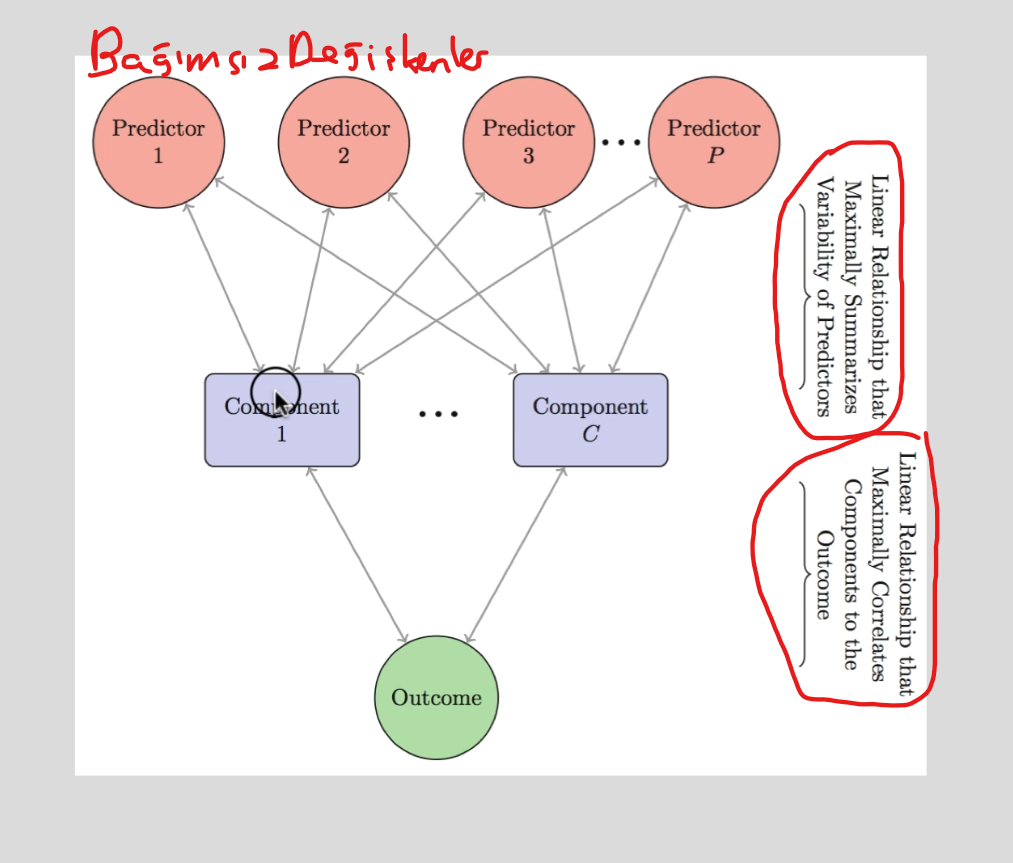

**PCL**
* Çok boyutluluk laneti p>n durumuna ve
* Coklu doğrusallık bağlantı problemine çözüm bulur.
* PLS'de, PCR gibi bağımsız değişkenlerin doğrusal kombinasyonlarını bulur. Bu doğrusal kombinasyonlar bileşen ya da latent(gizli) değişken olarak adlandırılır. 
* PLS, NIPALS'ın özel bir halidir, iteratif olarak bağımlı değişken ile yüksek korelasyona sahip değişkenler arasındaki latent ilişkiyi bulmaya çalışır. (PCR'dan ayıran kısım.)

**PCL VS PCR**
* PCR'da doğrusal kombinasyonlar yani bileşenler, bağımsız değişken uzayındaki değişkenliği maksimum maxsimum özetleyecek şekile oluşturulur. Bu durum, bağımlı değişkeni açıklama yeteneği olmamasına sebep olmakta. 
* PLS'te ise bileşenler, bağımlı değişken ile kovaryansı maksimum özetleyecek şekilde oluşturulur. 
* Değişkenler atılmak istenmiyor ve açıklanabilirlilik isteniyorsa => PLS
* Değişkenler atılmak isteniyor ve açıklanabilirlik önemsenmiyorsa => PCR
* PLS, gözetimli boyut indirgeme prosedürü; PCR, gözetimsiz boyut indirgeme prosedürü olarak görülebilir. (PLS'te yaptığımız boyut indirgeme işlemi bağımlı değişken odağında yapılıyor. Bu da gözetimli olmasını sağlıyor. PCR'da ise bağısmız değişkenleri kendi içerisinde indirgediğimiz için gözetimsiz boyut indirgeme oluyor.)
* İki yönteminde bir tunning parametresi vardır, o da bileşen sayısıdır.
* Optimum bileşen sayısını belirlemek için CV(corss validation) yöntemi kullanılır.

### Uygulama

#### 1.Model

In [43]:
hit = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41)

In [44]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [45]:
# Bileşen sayısı ile ilgili bir değer girmeyip, default olarak bırakıyorum. 
pls_model = PLSRegression().fit(X_train,y_train)

In [46]:
pls_model.coef_

array([[ 22.32259471],
       [ 36.32859695],
       [ 15.17185618],
       [ 29.93752373],
       [ 37.05214912],
       [ 45.54718286],
       [  7.22314062],
       [ 26.02736502],
       [ 31.03037481],
       [ 27.03301643],
       [ 29.85264161],
       [ 34.90958594],
       [ 24.31157213],
       [ 68.36870681],
       [ 15.16019029],
       [  4.07352374],
       [ 25.35492154],
       [-51.67258241],
       [ 18.62187938]])

In [47]:
# bileşen sayısını değiştirip gözlemleyelim
pls_modelX = PLSRegression(n_components=6).fit(X_train,y_train)
pls_model.coef_

array([[ 22.32259471],
       [ 36.32859695],
       [ 15.17185618],
       [ 29.93752373],
       [ 37.05214912],
       [ 45.54718286],
       [  7.22314062],
       [ 26.02736502],
       [ 31.03037481],
       [ 27.03301643],
       [ 29.85264161],
       [ 34.90958594],
       [ 24.31157213],
       [ 68.36870681],
       [ 15.16019029],
       [  4.07352374],
       [ 25.35492154],
       [-51.67258241],
       [ 18.62187938]])

Burada components sayısını ayarladık dikkat edersen, değişken sayısını değil. Yukarıdaki resimden bakarsan daha iyi anlarsın. Elimizdeki değişken sayısını falan burada azaltmıyoruz dikkat et.

#### 2.Tahmin

In [48]:
pls_modelX

PLSRegression(n_components=6)

In [49]:
y_pred = pls_model.predict(X_train)

In [50]:
np.sqrt(mean_squared_error(y_train,y_pred)) #eğitim hatası

328.9654598937474

In [51]:
r2_score(y_train,y_pred) #r2 

0.4671177064681401

In [52]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred)) # test hatamız

338.2548728519701

In [53]:
r2_score(y_test,y_pred)

0.43254466880849407

#### 3.Model Tunning

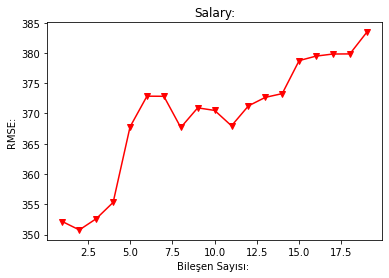

In [54]:
cv_10 = model_selection.KFold(n_splits=10, shuffle = True, random_state=1)
RMSE = []

for i in np.arange(1,X_train.shape[1]+1):
  pls = PLSRegression(n_components=i)
  score = np.sqrt(-1*cross_val_score(pls,X_train,y_train, cv = cv_10,scoring="neg_mean_squared_error").mean())
  RMSE.append(score)

#sonuçların gösterilmesi
plt.plot(np.arange(1, X_train.shape[1]+1), np.array(RMSE), "-v", c="r")
plt.xlabel("Bileşen Sayısı: ")
plt.ylabel("RMSE:")
plt.title("Salary:");

Gördüğün üzere en iyi sonucu 2 ya da 3 bileşende alıyor. Şimdi 2 bileşene göre modelimizi tekrardan fitleyelim:

In [55]:
pls_model2 = PLSRegression(n_components = 2).fit(X_train,y_train)

In [56]:
# eğitim hatası
y_pred_egitim = pls_model2.predict(X_train)
print("2 bileşen ile eğitim hatamız..: ",np.sqrt(mean_squared_error(y_train,y_pred_egitim)))

# test hatası
y_pred_test = pls_model2.predict(X_test)
print("2 bileşen ile Test hatası..:",np.sqrt(mean_squared_error(y_test, y_pred_test)))

2 bileşen ile eğitim hatamız..:  328.9654598937474
2 bileşen ile Test hatası..: 338.2548728519701


Cross val ile oluşturduğumuz için yukarıdaki değerler valide edilmiş hatalar!!!
EVEEEEt, yukarıdaki final moelimizdi, aslında işin kod kısmı bu kadar. Önemli olan konunun detaylarını bilmek.

## RIDGE REGRESSION

### Teori

Vahit hocamın tabiriyle Doğrusal Regresyonun teyze çocuklarındayız :D

Buradaki amaç, hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.
 
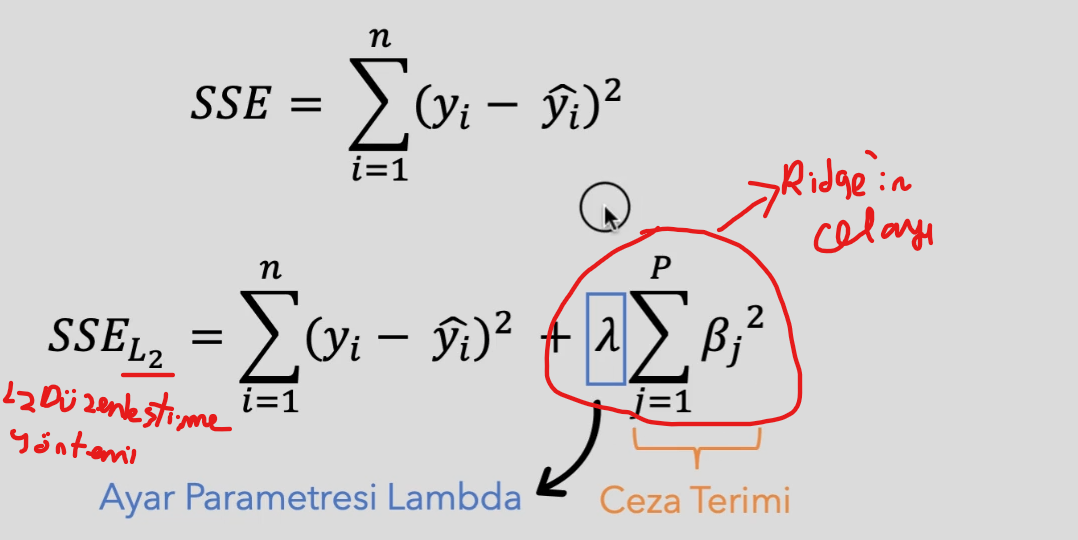

Lambda'yı hiperparametre olarak kullanıp ceza üzerinde ayarlamalar yapabiliriz.

Ridge Regresyon Özellikleri:
* Aşırı öğrenmeye dirençlidir.
* Yanlıdır fakat varyansı düşüktür. (yanlılık = bias)(Bazen yanlı modelleri daha çok tercih ederiz.)
* Çok fazla parametre olduğunda SSE(EKK)'ya göre daha iyidir.
* Çok boyutluluk lanetine karşı çözüm sunar.
* Çoklu doğrual bağlantı problemi olduğunda etkilidir.
* Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.
* Lambda kritik roldedir. İki terimin (formüldeki) göreceli etkilerini kontrol etmeyi sağlar.
* Lambda için iyi bir değer bulunması önemlidir. Bunun için CV(cross val) kullanılır.
* Lambda derin öğrenmed de karşımıza çıkıyordu hatırlarsan. İşte lambdanın çıkış yeri burası :)
* L2 düzenleştirme yöntemi: Ridge, Lasso ve ElasticNet'te vardır.

### Uygulama

#### 1.Model


In [57]:
hit = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,ms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=42)

In [58]:
from sklearn.linear_model import Ridge

In [59]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [60]:
ridge_model

Ridge(alpha=0.1)

In [61]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

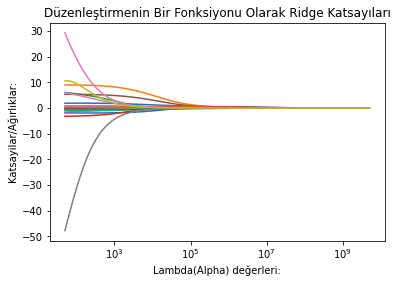

In [72]:
#lambda için bir array oluşturup deneyeceğiz:
lambdalar = 10**np.linspace(10,2,100)*0.5

ridge_model = Ridge()
katsayilar = []
for i in lambdalar:
  ridge_model.set_params(alpha = i) # lambda değerleri giriyor
  ridge_model.fit(X_train,y_train)
  katsayilar.append(ridge_model.coef_)

# görselleştielim
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")
plt.xlabel("Lambda(Alpha) değerleri:")
plt.ylabel("Katsayilar/Ağırlıklar:")
plt.title("Düzenleştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları");


Ridge Regresyonu, hiç bir katsayıyı 0 yapmaya çalışmaz. Etkisi az olan değişkenleri etkisiz hale getirmek için katsayılarını sıfıra yaklaştırır. Değişkenleri atmak yerine bu yolu tercih etmiş Ridge Reg.

Lambdanın önemini vurgulamakta fayda var. Ridge regresyon ve Lasso regresyonda önceki regresyon türlerine göre ilk defa katsayilara(bağımsız değişkenler, ağırlıklar) temas ettik. Katsayılara bir ceza uygulanarak değerleri değiştirilebiliyor. İşte bu katsayıların şiddetini biz lambda değerini kullanarak belirleyebiliyoruz. 

Ağaç ve yapay sinir ağalrı konularında da göreceksin, ceza mantığı oralarda da var ve bu ceza şiddetine biz lambda ile ulaşıyoruz.

#### 2. Tahmin

In [73]:
y_pred_test = ridge_model.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

357.10586173525263

In [75]:
r2_score(y_test,y_pred_test)

0.4109061142435185

#### 3.Model Tunning

Optimum lambda değerini bulmaya çalışacağız. Yukarıdaki grafikte gözlemlediğimiz: çeşitli lambda değerlerine karşılık gelen katsayıları bulmaktı. Şimdi ise direk optimum lambdayı arayacağız.

In [76]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [77]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, scoring = "neg_mean_squared_error",normalize = True)

In [79]:
ridge_cv.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [81]:
# en uygun alphayı kendisi belirleyecek
ridge_cv.alpha_

0.7599555414764666

In [82]:
#şimdi bulduğumuz optimize lambda değeri ile final modelimizi kuralım....
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [84]:
#test hatamız, gördüğün gibi daha optimize hala getirmeye de çalışıyoruz kodu.
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415

## LASSO REGRESSION

### Teori

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır. Ridge Regresyondan farkı: katsayılara 0 değerinide verebilmektedir. Böylelikle değişken seçme(yani değişken çıkarma) işlemini yapabilmektedir. 

-Tibshirani (1996)

L1 düzlemi de denilmektedir Lasso Regresyonuna.

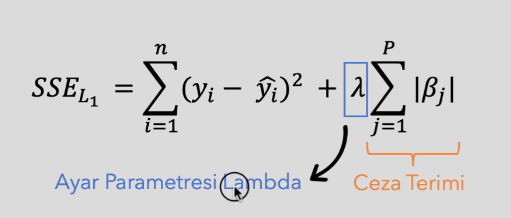

**Özellikleri:**
* Ridge Regresyonunun ilgili-ilgisiz tüm değişkenleri modelde tutması deazavantajını gidermek için ortaya çıkmıştır.
* Lasso'da katsayıları 0'a yaklaştırır.
* Fakat L1 formu, alpha değeri yeteri kadar büyük olduğunda bazı katsayıları 0 yapar. Böylece değişken seçimi yapmış olur.
* Alphanın doğru seçilmesi çok önemlidir. Burada da CV kullanılır.
* Ridge ve Lasso yöntemleri birbirinden üstün değildir.

**Aplha Ayar PArametresinin Belirlenmesi:**
* Alpha'nın 0 olduğu yer EKK değeri oluyor dolayısıyla. Çünkü ceza değerini 0 ile çarpmış oluyoruz. Hata Kareler Toplamını minimum yapan yeri arıyoruz.
* Alpha için belirli değerleri içeren bir küme seçilir ve her birisi için CV test hatası hesaplanır. 
* En küçük CV'yi veren Alpha ayar parametresi oalrak seçilir.
* Son olarak seçilen bu alpha değeri ile model yeniden fit edilir.

### Uygulama

####1.Model

In [86]:
hit = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [87]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.335e+06, tolerance: 3.855e+03
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.196e+03, tolerance: 3.855e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+04, tolerance: 3.855e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.104e+05, tolerance: 3.855e+03

Text(0, 0.5, 'weights')

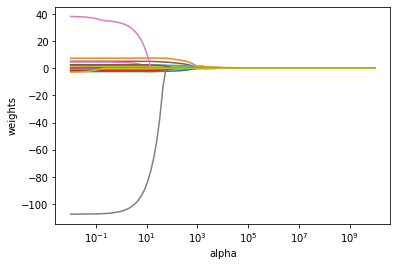

In [90]:
lasso = Lasso()

lambdalar = 10**np.linspace(10,-2,100)*0.5
katsayilar=[]

for i in lambdalar:
  lasso.set_params(alpha = i)
  lasso.fit(X_train,y_train)
  katsayilar.append(lasso.coef_) 

ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")

Not: Yukarıdaki hataları göz ardı edebilirsin. Tek bir model değilde oluşturduğun tüm modeller için hataları sıraladı.

Burada alphanın belli bir noktasından sonra tüm değerler 0 oluyor. Ridge'te ise 0 etrafında oluyordu ama 0 olmuyordu.

Asıl önemli nokta: weights dediğimiz sayıların, değişkenlerin katsayıları olduğunu anla!!! Bu sana yapay sinir ağlarında çok işine yarayacak.

#### 2.Tahmin

In [91]:
lasso_model.predict(X_test)

array([ 584.93051062,  248.66065308,  825.80762183,  583.65269679,
        477.64624602,  820.50509965,  431.73909591,   89.8994104 ,
        689.83984454,  356.79827501,  285.55397349, 1311.39943534,
        392.33552447,  952.26771896,  871.66484931,  290.79101798,
        696.68961389,  432.16550525,  334.93481032,  221.90073135,
         -9.73807835,  485.90896017,  412.67796607,  154.97856898,
        546.68269644,  353.7149714 , 1008.42272728,  796.02332992,
        959.039557  ,  357.84339417,  508.52390278,  373.69048155,
        654.0668373 ,  186.09517971,  634.56225969,  409.93248124,
        785.48782884,  557.46006238,  173.47692088,  607.1039098 ,
        420.6382456 ,  382.47958487,  642.76069344,  265.46726167,
        698.28470938,  805.20739138,  264.79070188,   93.82685589,
        640.30060359,  243.0820067 ,  360.10125407,  341.26289002,
        741.80521027,  648.07187307,  464.14708916,  550.03287218,
        908.80346292,  263.87792087,  359.3585641 ,  338.32272

In [92]:
np.sqrt(mean_squared_error(y_test,lasso_model.predict(X_test)))

366.0376896336587

In [93]:
r2_score(y_test,lasso_model.predict(X_test))

0.4008787152938359

#### 3.Model Tunning

Lasso regresyon modeli için optimum alpha değerini bulup final modelini oluşturacağız.

In [94]:
from sklearn.linear_model import LassoCV

In [95]:
lasso_cv_model = LassoCV(alphas = None, cv=10, max_iter=10_000,normalize = True)

In [96]:
lasso_cv_model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=10000, normalize=True)

In [97]:
#optimum alpha
lasso_cv_model.alpha_

0.06181582489099104

Yukarıda alpha değerini None girip fonksiyonun ön tanımlı değerlerden hesaplamasına izin verdik. Eğer kafanda belli bir değer yoksa, alpha-learning rate artık hangi konudaysan, parametre için uygun değer bulma işini fonkiyonun kendisine bırakman akıllıca olacaktır.

In [98]:
#final model oluşturalım.
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.343e+06, tolerance: 3.855e+03
  model = cd_fast.enet_coordinate_descent(


In [100]:
np.sqrt(mean_squared_error(y_test,lasso_tuned.predict(X_test)))

366.02526668002804

386.6826429756415, soldaki Ridge reg'teki değerimiz. Lasso ile hazırladığımız görece daha iyi sonuç verdi. İşte modelelr arası seçim sana kardeşim.

In [101]:
r2_score(y_test,lasso_tuned.predict(X_test))

0.4009193817598764

## ELASTICNET REGRESSION

### Teori

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara ceza uygulayarak bulmaktır. ENet L1 ve L2 yaklaşımlarını birleştirir.

-Zou & Hastie 2005

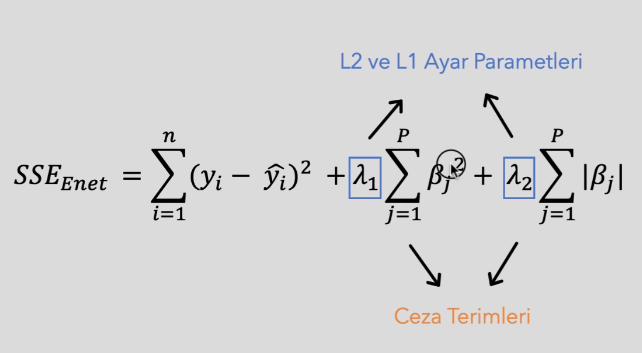

### Uygulama

#### 1.Model

In [107]:
hitler = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/Hitters.csv")
df = hitler.copy()
df = df.dropna()
y = df["Salary"]
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]],axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [109]:
from sklearn.linear_model import ElasticNet

In [110]:
enet_model = ElasticNet().fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [111]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [112]:
enet_model.intercept_

-6.465955602112331

#### 2.Tahmin

In [115]:
print("Test hatamız:",np.sqrt(mean_squared_error(y_test,enet_model.predict(X_test))))
print("R2 değeri/açıklanabilirlik oranı:",r2_score(y_test,enet_model.predict(X_test)))

Test hatamız: 357.1676548181246
R2 değeri/açıklanabilirlik oranı: 0.41070222469326867


#### 3.Model Tuning

In [116]:
from sklearn.linear_model import ElasticNetCV

In [117]:
enet_cv_model = ElasticNetCV(cv=10, random_state = 0).fit(X_train, y_train)

In [118]:
enet_cv_model.alpha_

5230.7647364798695

In [119]:
#final modeli kuralım
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [120]:
np.sqrt(mean_squared_error(y_test,enet_tuned.predict(X_test)))

394.15280563218795

Yukarıdaki tüm modellerle kıyaslayınca test hatalarını: Lasso bizim için en iyisi olduğu ortaya çıkıyor...

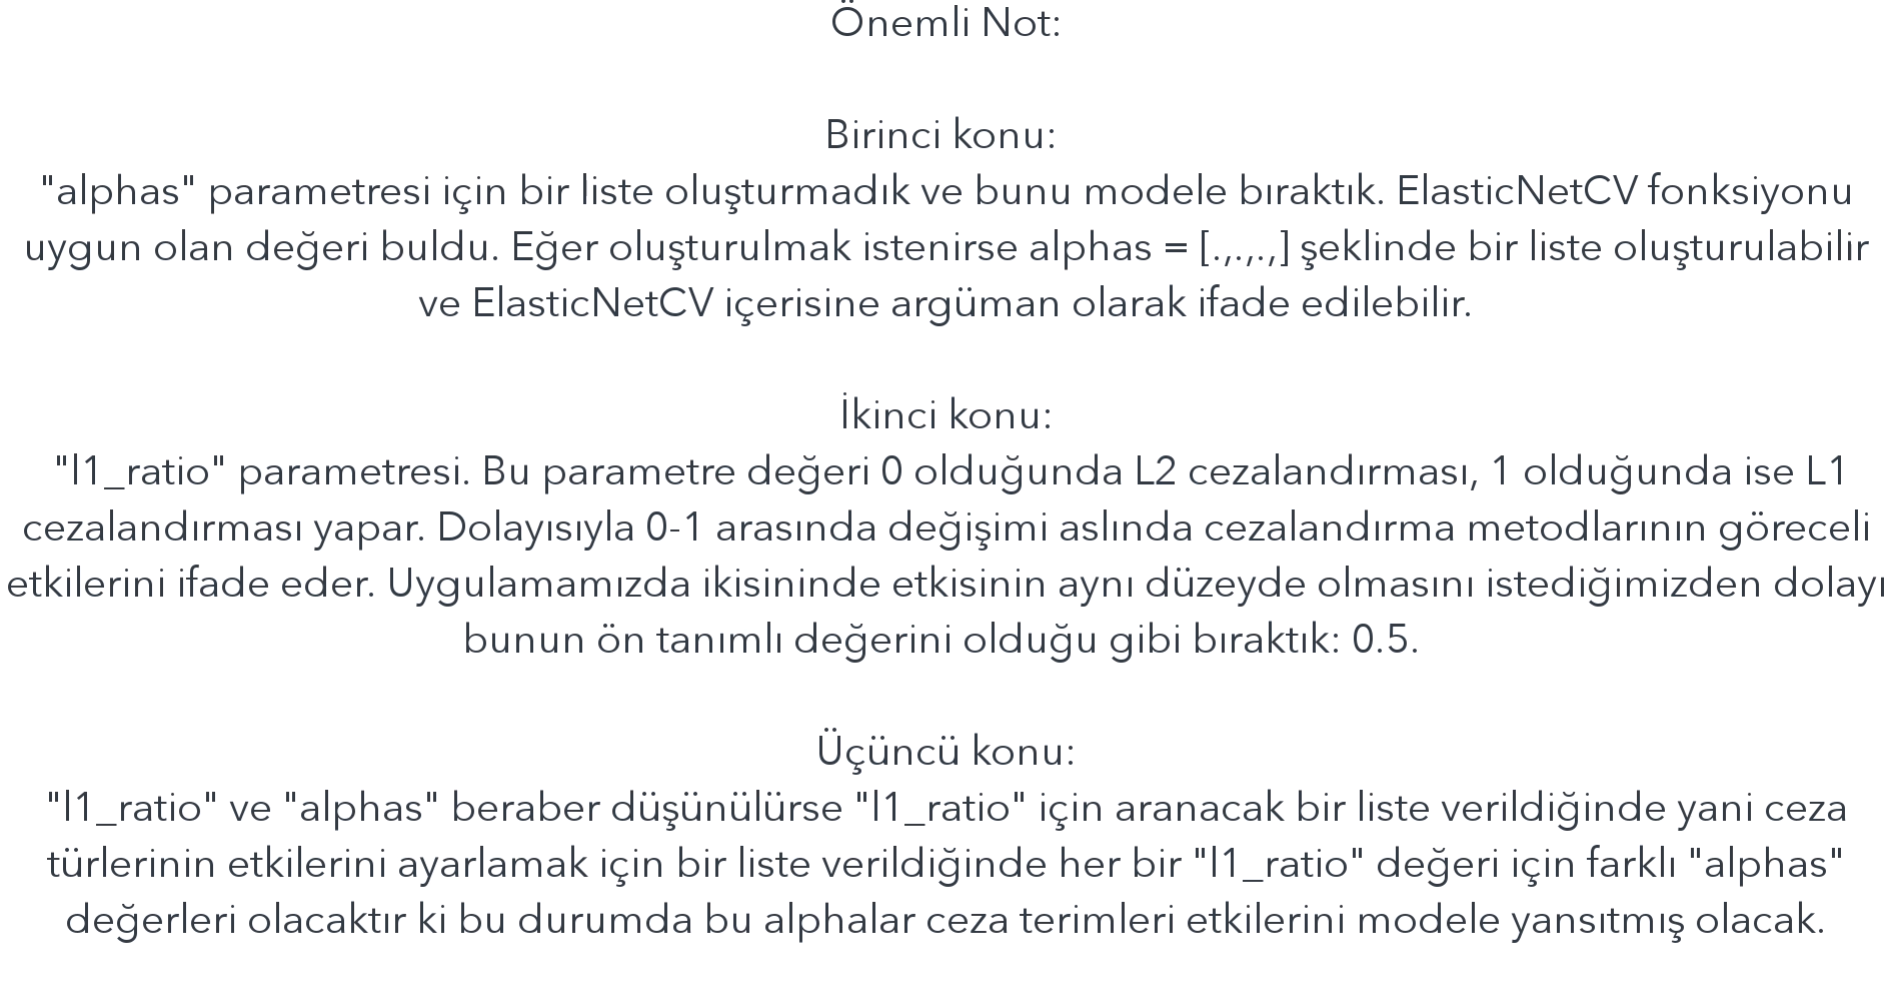